# KNN classification
KNN makes predictions according to the class density of the nearest neighbors of the vector formed by the independent variables of the value to be predicted. The distance of the point to be predicted to other points is calculated. The Minkowski distance calculation function is used for this. (K: We tell you how many nearest neighbors will be calculated.)

In [14]:
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np 
import seaborn as sns
import importlib
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold ,cross_val_score

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from src.utils.config import Config
from src.visualization import visualize
from src.data import make_dataset
from src.features import build_features


sns.set(
    style='whitegrid',
    font_scale=1.5
)

plt.style.use('ggplot')

In [2]:
labled_data_set,expression_level,labels,true_labels= make_dataset.get_data("original")
labled_data_set_sd,expression_level_sd,labels,true_labels= make_dataset.get_data("standardized")



In [3]:
X = expression_level
Y = labels["Class"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10 ,shuffle=Y)
k=KNeighborsClassifier()
k.fit(X_train,Y_train)
result=k.predict(X_test)
print(f"Accuracy = {accuracy_score(Y_test,result)}")


Accuracy = 0.995850622406639


In [4]:
X = expression_level_sd
Y = labels["Class"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10 ,shuffle=Y)
k=KNeighborsClassifier()
k.fit(X_train,Y_train)
result=k.predict(X_test)
print(f"Accuracy = {accuracy_score(Y_test,result)}")

Accuracy = 1.0


In [5]:
importlib.reload(make_dataset)
HGV,PCA,UMAP,TSNA=make_dataset.get_transformed_data()

In [6]:
X = UMAP
Y = labels["Class"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10 ,shuffle=Y)
k=KNeighborsClassifier()
k.fit(X_train,Y_train)
result=k.predict(X_test)
print(f"Accuracy = {accuracy_score(Y_test,result)}")

Accuracy = 1.0


Accuracy = 1.0


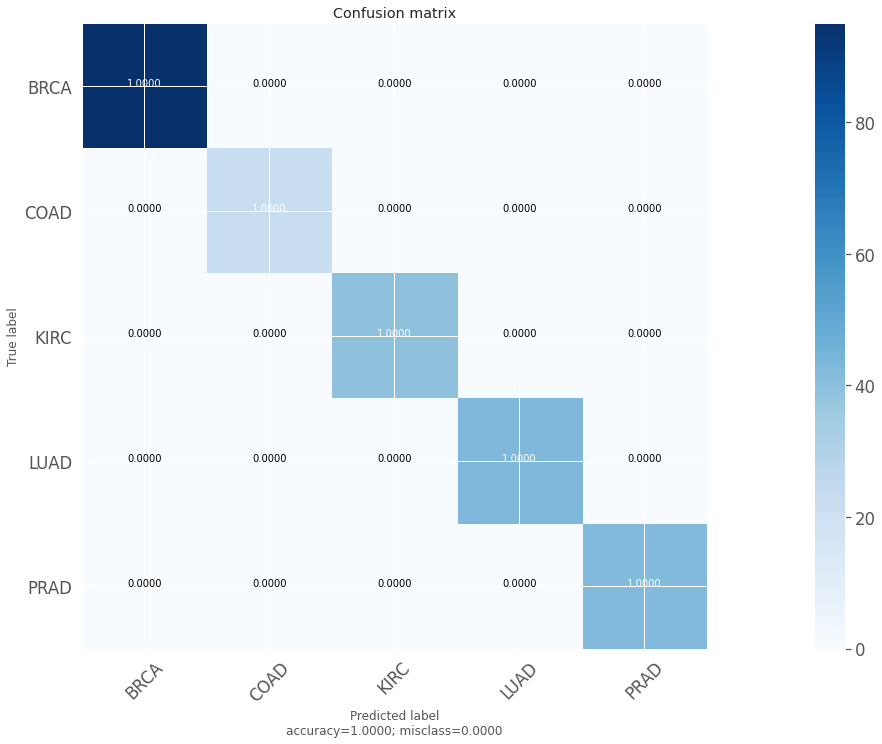

In [7]:
X = TSNA
Y = labels["Class"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10 ,shuffle=Y)
k=KNeighborsClassifier()
k.fit(X_train,Y_train)
result=k.predict(X_test)
print(f"Accuracy = {accuracy_score(Y_test,result)}")

cm=confusion_matrix(Y_test,result)
visualize.plot_confusion_matrix(cm,
    np.unique(Y_train),
    title='Confusion matrix',
    cmap=None,
    normalize=True)


Accuracy = 0.9585062240663901


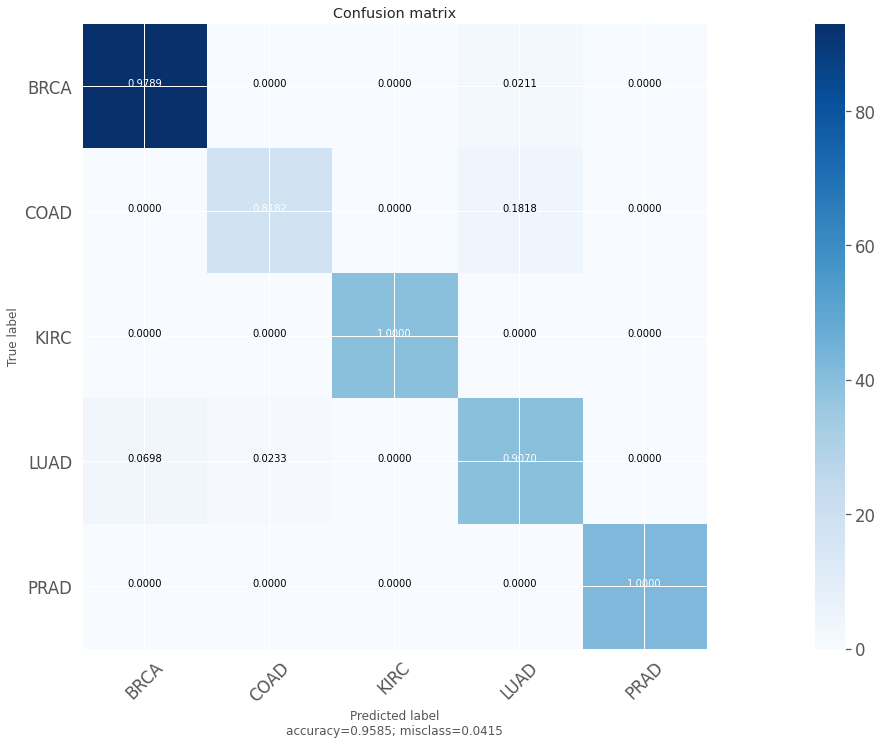

In [8]:
X = PCA
Y = labels["Class"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10 ,shuffle=Y)
k=KNeighborsClassifier()
k.fit(X_train,Y_train)
result=k.predict(X_test)
print(f"Accuracy = {accuracy_score(Y_test,result)}")
cm=confusion_matrix(Y_test,result)
visualize.plot_confusion_matrix(cm,
    np.unique(Y_train),
    title='Confusion matrix',
    cmap=None,
    normalize=True)

# Cross Validation 

In [15]:
X = expression_level
Y = labels["Class"].values

model=KNeighborsClassifier()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.999 (0.004)


Standardization and dimension algorithms like UMAP T-SNE improved the accuracy of the KNN model , meanwhile , using PCA data lowered the performances of our model  

# Learning Curves

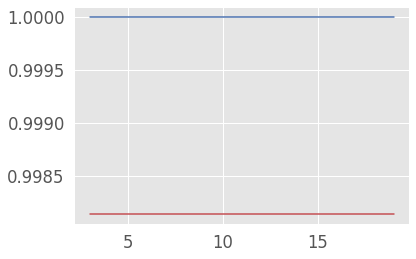

In [20]:
importlib.reload(visualize)
KNN=KNeighborsClassifier()
visualize.learning_curve (
    data=expression_level,
    labels=labels["Class"].values,
    model= KNN,
    range_=[3,20]
    title= "fdf"
    )

    